In [231]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [273]:
def format_figure():
    #setting up formatting things
    sns.set_theme(context='talk', font_scale = 1)
    sns.set_style("white")
    sns.despine()
        
       
        
def passage_group(passage):
    #use this function to group passages into groups for plotting
    passage_group_dict = {}
    passage_groups = ['P6-8','P9-10','P11-13','P14-16','P17-18','P20-21']
    for group in passage_groups:
        if group == 'P6-8':
            passage_group_dict['P6'] = 'P6-8'
            passage_group_dict['P7'] = 'P6-8'
            passage_group_dict['P8'] = 'P6-8'
        elif group == 'P9-10':
            passage_group_dict['P9'] = 'P9-10'
            passage_group_dict['P10'] = 'P9-10'
        elif group == 'P11-13':
            passage_group_dict['P11'] = 'P11-13'
            passage_group_dict['P12'] = 'P11-13'
            passage_group_dict['P13'] = 'P11-13'
        elif group == 'P14-16':
            passage_group_dict['P14'] = 'P14-16'
            passage_group_dict['P15'] = 'P14-16'
            passage_group_dict['P16'] = 'P14-16'
        elif group == 'P17-18':
            passage_group_dict['P17'] = 'P17-18'
            passage_group_dict['P18'] = 'P17-18'
        elif group == 'P20-21':
            passage_group_dict['P20'] = 'P20-21'
            passage_group_dict['P21'] = 'P20-21'
    return passage_group_dict[passage]

# Proliferation - Growth Curves
Code to make growth curves for 

R1 /Users/allielas/Desktop/Active Projects/Doubling TImes/growth_data/R1_Growth_Mar13.csv
R2 /Users/allielas/Desktop/Active Projects/Doubling TImes/growth_data/R2_Growth_Mar23.csv
R3 /Users/allielas/Desktop/Active Projects/Doubling TImes/growth_data/R4_Growth_Nov12.csv
R4 /Users/allielas/Desktop/Active Projects/Doubling TImes/growth_data/R3_Growth_Oct18.csv


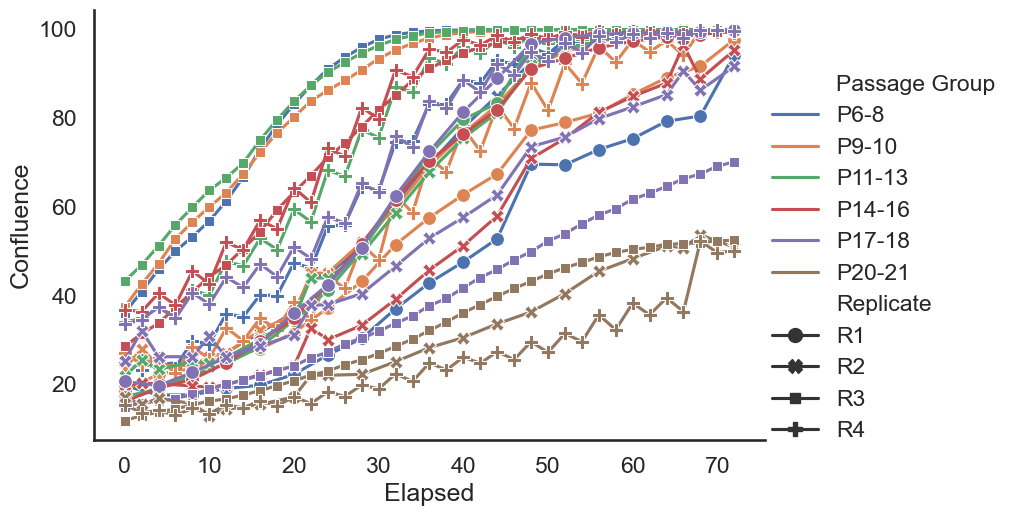

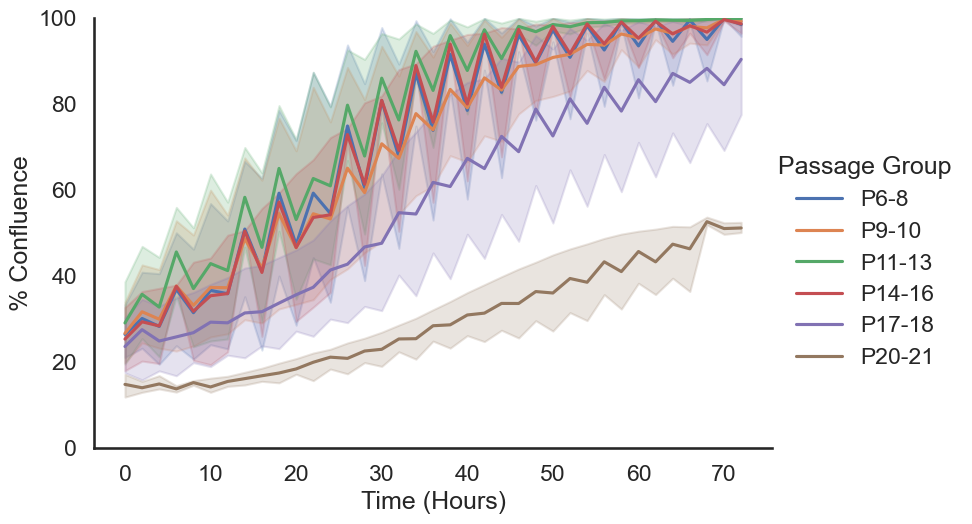

In [274]:
import glob
#For multiple lines
#Write down path of growth data
csv_files_path = '/Users/allielas/Desktop/Active Projects/Doubling TImes/growth_data/*.csv'
save_path='/Users/allielas/Desktop/Active Projects/Doubling TImes/All_Growth3.png'

#Read in all csv files in the folder and add the replicate number
csv_files = glob.glob(csv_files_path)
data_frames = []
for i,file in enumerate(csv_files):
    df = pd.read_csv(file)
    df['Replicate'] = f'R{i+1}'
    print(df['Replicate'][i],file)
    data_frames.append(df)

#create a combined dataframe by concantenating everything and melting it by elapsed time and replicate
combined_growth_data = pd.concat(data_frames, ignore_index=True)
melted_combined_data = combined_growth_data.melt(id_vars=['Elapsed','Replicate'], var_name='Passage', value_name='Confluence')
melted_combined_data.dropna(inplace=True)

melted_combined_data["Passage Group"] = melted_combined_data['Passage'].apply(passage_group)

passage_order = ['P6-8','P9-10','P11-13','P14-16','P17-18','P20-21']

ax = sns.relplot(data = melted_combined_data, x='Elapsed', y ='Confluence', 
                  hue = 'Passage Group', hue_order=passage_order , dashes = False, 
                  errorbar=('ci', 95), kind='line', height=5.5,
                  style='Replicate', style_order=["R1","R2","R3","R4"], markers=True, markersize=10, aspect=1.5, legend='full') 

ax2 = sns.relplot(data = melted_combined_data, x='Elapsed', y ='Confluence', 
                  hue = 'Passage Group', hue_order=passage_order , dashes = False, 
                  errorbar=('ci', 95), kind = 'line', height=5.5,
                  aspect=1.5, legend='full') 
                
plt.xlabel("Time (Hours)")
plt.ylabel('% Confluence')
plt.ylim(0,100)

format_figure()
plt.show()
ax.figure.savefig(save_path, format='png', dpi=300, bbox_inches='tight', transparent=True)  



In [303]:
# Calculate the doubling time for each passage group
from scipy.optimize import curve_fit
# Define the exponential growth function
def exponential_growth(t, N0, k):
    return N0 * np.exp(k * t)

# Calculate doubling time for each passage group
doubling_times = {}
for passage_group in passage_order:
    group_data = melted_combined_data[melted_combined_data['Passage Group'] == passage_group]
    if not group_data.empty:
        # Group by Elapsed time and calculate the mean confluence
        mean_group_data = group_data.groupby('Elapsed').agg({'Confluence': 'mean'}).reset_index()
        print(mean_group_data.head())
        
        # Provide initial guesses for N0 and k
        initial_guesses = [mean_group_data['Confluence'].iloc[0], 0.1]  # Initial confluence and a small growth rate
        
        # Fit the exponential growth model
        try:
            popt, _ = curve_fit(exponential_growth, mean_group_data['Elapsed'], mean_group_data['Confluence'], p0=initial_guesses, maxfev=10000)
            N0, k = popt
            # Calculate the doubling time
            doubling_time = np.log(2) / k
            doubling_times[passage_group] = doubling_time
        except RuntimeError:
            print(f"Could not fit data for passage group {passage_group}")

# Print the doubling times
for passage_group, doubling_time in doubling_times.items():
    print(f'Doubling time for {passage_group}: {doubling_time:.2f} hours')

   Elapsed  Confluence
0        0   26.442116
1        2   30.134633
2        4   28.287474
3        6   36.931485
4        8   31.481820
   Elapsed  Confluence
0        0   26.683654
1        2   31.693637
2        4   29.969307
3        6   37.699655
4        8   33.192690
   Elapsed  Confluence
0        0   29.094448
1        2   35.747647
2        4   32.780107
3        6   45.601820
4        8   37.090803
   Elapsed  Confluence
0        0   25.346210
1        2   29.361110
2        4   28.400809
3        6   37.617185
4        8   31.801362
   Elapsed  Confluence
0        0   23.620826
1        2   27.534117
2        4   24.891058
3        6   25.855220
4        8   26.834565
   Elapsed  Confluence
0        0   14.807987
1        2   14.026137
2        4   14.909877
3        6   13.761940
4        8   15.221737
Doubling time for P6-8: 49.77 hours
Doubling time for P9-10: 47.69 hours
Doubling time for P11-13: 55.96 hours
Doubling time for P14-16: 49.06 hours
Doubling time for P17-1

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/bigdisk1/AllieSpangaro/HTP_fibroblasts_mitolyso/curves/MRC-5_Growth.png'

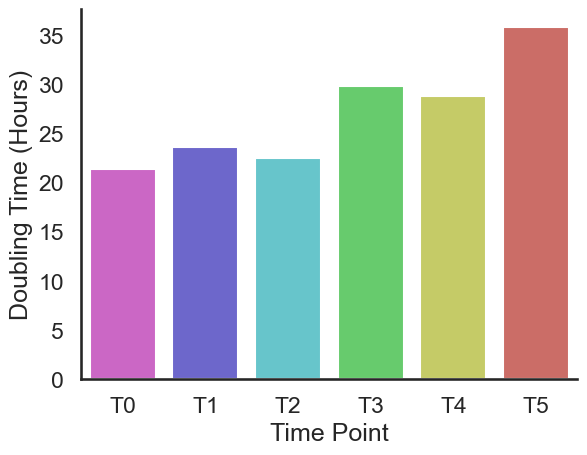

In [19]:
data = pd.DataFrame(
    {
        'Time point': ['T5','T4','T3', 'T2', 'T1', 'T0'], 
        'Average Doubling Time': [35.88474106,28.85454307,29.84896075,22.56561279,23.70874073,21.42517451]
    }
)

save_path = "/mnt/bigdisk1/AllieSpangaro/HTP_fibroblasts_mitolyso/curves/"

from scipy.stats import f_oneway

sns.set_theme(context='talk', font_scale = 1)
sns.set_style("white")
ax = sns.barplot(data = data, y='Average Doubling Time', x='Time point', hue = 'Time point', palette = sns.hls_palette(), order=['T0','T1','T2','T3','T4','T5'])
plt.xlabel("Time Point")
plt.ylabel('Doubling Time (Hours)')
#plt.ylim(0,30)
sns.despine()
plt.savefig(save_path+"MRC-5_Growth.png", format='png', transparent=True, bbox_inches="tight")

/var/folders/yd/1fhlg3pn6d74xlj_wkkzgcrc0000gn/T/ipykernel_27324/145887412.py:15: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax2 = sns.catplot(data = data_melted,


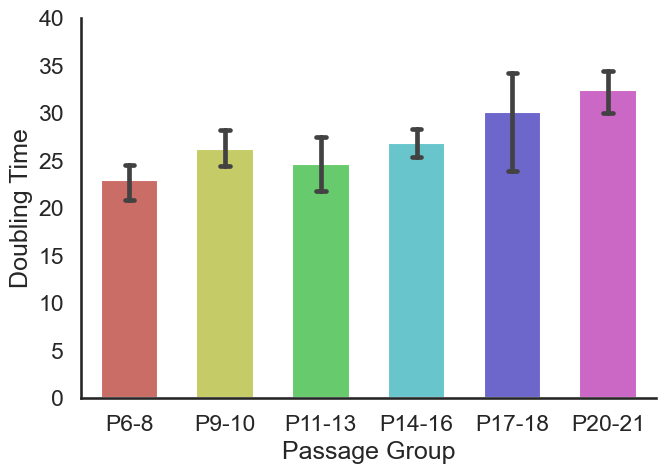

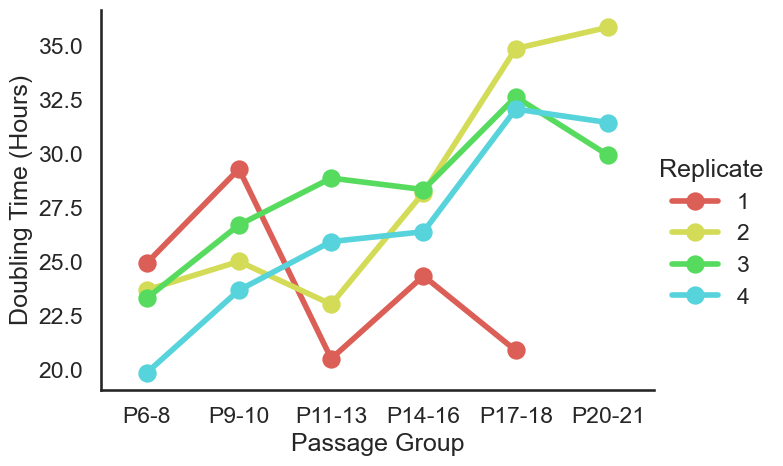

In [262]:

data = pd.read_csv('/Users/allielas/Desktop/Active Projects/Doubling TImes/finaltimes.csv', header=0)
save_path="/Users/allielas/Desktop/Active Projects/Doubling TImes/doubling_times_bar.png"

#melt to assign the doubling times to specific values
data_melted = data.melt(id_vars="Replicate", var_name="Passage Group", value_name="Doubling Time")

#means = data_melted.groupby("Passage Group")["Doubling Time"].mean().reset_index()
# You don't actually need the groupbyup there, you can just use the hue_order parameter in the sns.catplot function

#plotting
ax = sns.catplot(data = data_melted, 
                 x='Passage Group', y='Doubling Time', hue='Passage Group',
                 hue_order=['P6-8','P9-10','P11-13','P14-16','P17-18','P20-21'], 
                 errorbar=('ci',95), palette = sns.hls_palette(), kind='bar', capsize=0.1, aspect=1.4, width=0.6)  
ax2 = sns.catplot(data = data_melted, 
                 x='Passage Group', y='Doubling Time', hue='Replicate',
                 order=['P6-8','P9-10','P11-13','P14-16','P17-18','P20-21'], 
                 errorbar=('ci',95), palette = sns.hls_palette(), kind='point', aspect=1.4)  

plt.ylabel('Doubling Time (Hours)')
plt.xlabel('Passage Group')
ax.set(ylim=(0, 40))
format_figure()
plt.show()
ax.figure.savefig(save_path, format='png', dpi=300, bbox_inches='tight', transparent=True) 






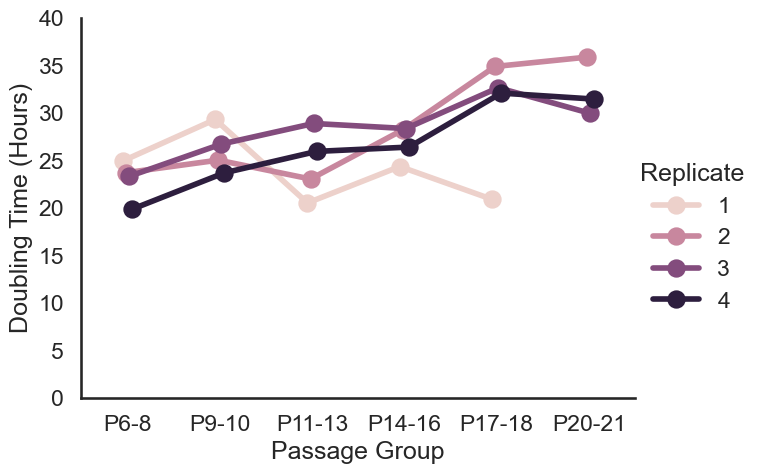

<Figure size 640x480 with 0 Axes>

In [163]:

#plotting
ax = sns.catplot(data = data_melted, 
                 x='Passage Group', y='Doubling Time', hue='Replicate',
                 order=['P6-8','P9-10','P11-13','P14-16','P17-18','P20-21'], 
                 errorbar=('ci'), kind='point', aspect=1.4, dodge=True)  

doubling_time_figure(ax,save=True, save_path="/Users/allielas/Desktop/Active Projects/Doubling TImes/doubling_times_point.png")





